In [12]:
import seaborn as sns
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np

In [2]:
df = pd.read_csv("../data/GPT-wiki-intro.csv")

In [3]:
df.head()

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162


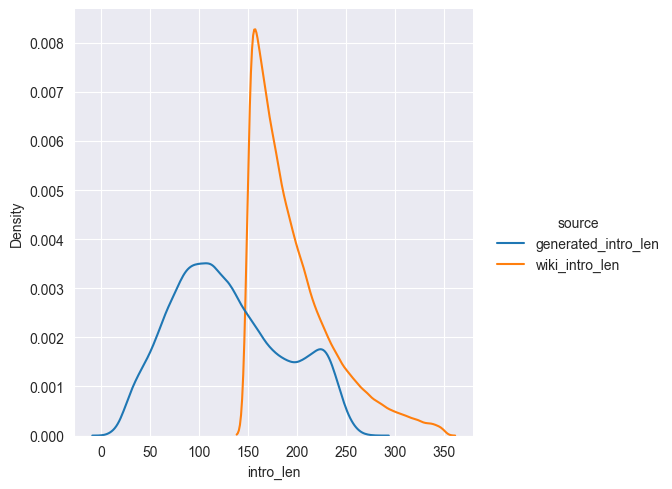

In [4]:
melted_df = pd.melt(df, value_vars=["generated_intro_len", "wiki_intro_len"], var_name="source", value_name="intro_len")
sns.displot(data=melted_df, x="intro_len", hue="source", kind="kde")

In [51]:
wiki_words = set(word_tokenize(" ".join(list(df["wiki_intro"].values))))
generated_words = set(word_tokenize(" ".join(list(df["generated_intro"].values))))

In [52]:
print(f"wikipedia vocab size: {len(wiki_words)}")
print(f"GPT vocab size: {len(generated_words)}")

wikipedia vocab size: 783883
GPT vocab size: 348605
